# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

#choosing red wine data from the data/ folder
wine = pd.read_csv("data/winequality-red.csv", sep=";")

#chicking shape (rows, columns)
print(wine.shape)

#random sample of 10
wine.sample(10, random_state=42)


(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
976,7.2,0.41,0.30,2.10,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5
1493,7.7,0.54,0.26,1.90,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5
706,7.0,0.78,0.08,2.00,0.093,10.0,19.0,0.99560,3.40,0.47,10.0,5
613,8.2,0.39,0.38,1.50,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5
1587,5.8,0.61,0.11,1.80,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6


YOUR ANSWERS HERE

I loaded the red wine quality dataset and displayed a random sample of 10 rows to confirm the data was imported correctly.

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [4]:
# YOUR CODE HERE

list(wine.columns)


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

YOUR ANSWERS HERE

fixed acidity – These are the main acids in the wine that don’t evaporate. They affect how sharp or acidic the wine tastes.\
volatile acidity – Acids that do evaporate more easily. Too much of this can make the wine smell a bit like vinegar.\
citric acid – A small amount of citric acid that can give the wine a slight “fresh” or bright taste.\
residual sugar – The sugar that’s left over after fermentation. More leftover sugar usually means the wine tastes sweeter.\
chlorides – Basically the salt level in the wine. It can subtly affect the flavor.\
free sulfur dioxide – The active form of sulfur dioxide that protects the wine from spoiling or oxidising.\
total sulfur dioxide – This is the free SO₂ plus the part that’s already reacted with other compounds.\
density – How dense the wine is. It usually changes depending on how much sugar and alcohol are in it.\
pH – A measurement of how acidic or basic the wine is. Lower pH means more acidity.\
sulphates – These help preserve the wine and can influence how much sulfur dioxide the wine needs.\
alcohol – The alcohol percentage of the wine.\
quality – A quality score given by human tasters based on how good they think the wine is.

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

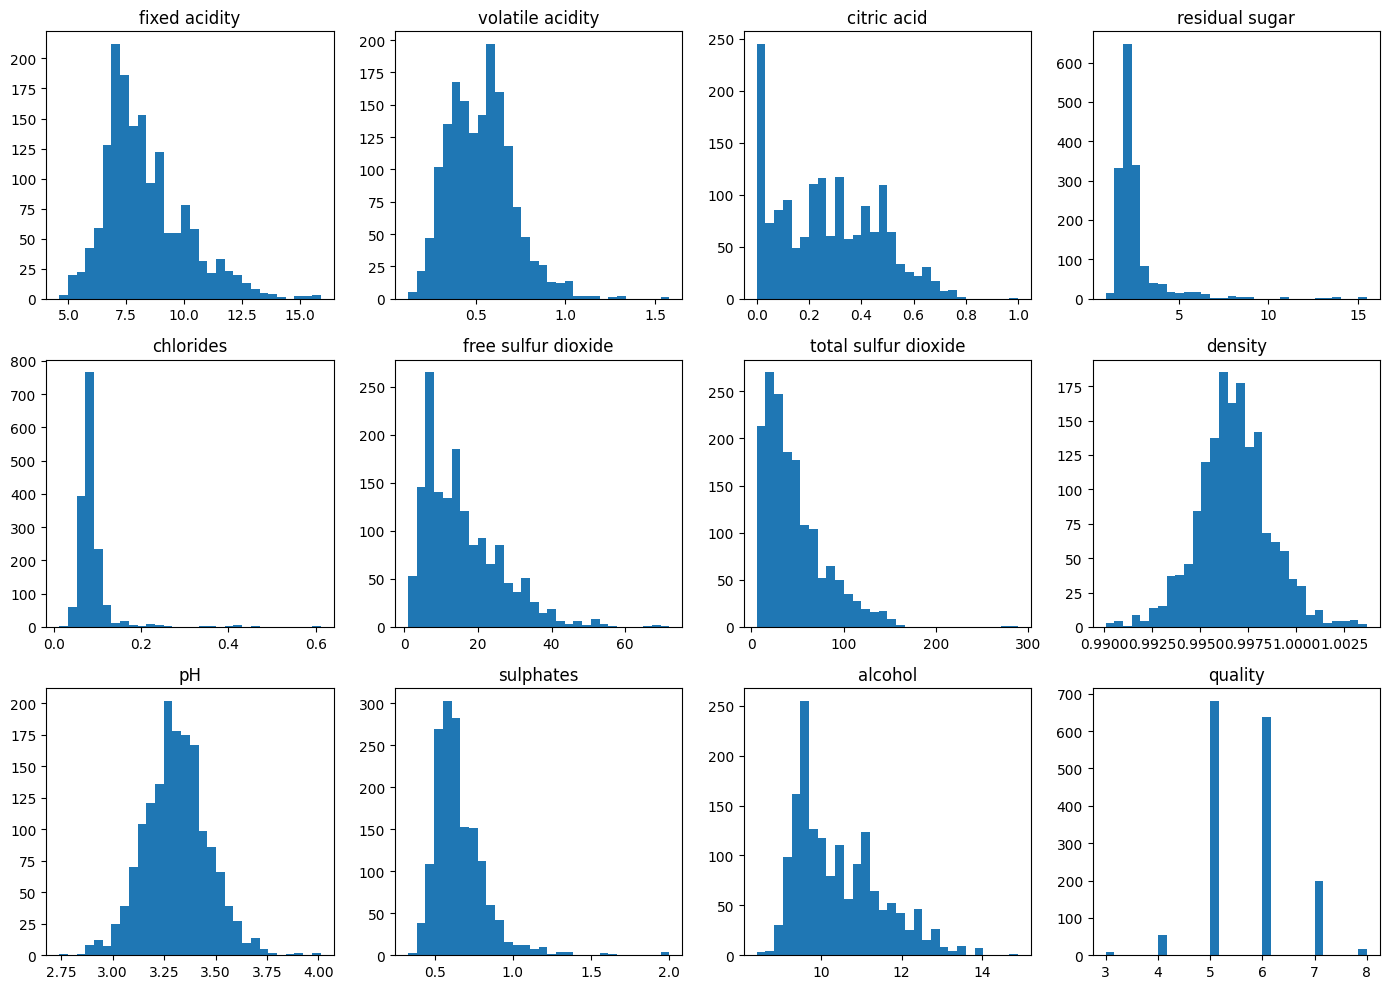

In [5]:
# YOUR CODE HERE

plt.figure(figsize=(14, 10))

for i, col in enumerate(wine.columns, start=1):
    plt.subplot(3, 4, i)
    plt.hist(wine[col], bins=30)
    plt.title(col)
    plt.tight_layout()

plt.show()

YOUR ANSWERS HERE

__fixed acidity__:
This has one main peak around 7–8 and a long right tail. It looks like a right-skewed normal distribution.

__volatile acidity__:
Most wines have low values, and it drops off as the values increase. This looks like an exponential-type right-skewed distribution.

__citric acid__:
Many wines have very low citric acid and then a tail stretching toward higher values. This is clearly a right-skewed distribution.

__residual sugar__:
Most wines are clustered at very low sugar levels, with a long tail of higher values. This resembles an exponential right-skewed distribution.

__chlorides__:
Values are tightly clustered toward the low end but show a long right tail. This is a right-skewed distribution.

__free sulfur dioxide__:
A lot of samples have low levels, and counts drop off as values rise. This is another right-skewed distribution.

__total sulfur dioxide__:
Very similar to free SO₂ — heavily concentrated at low values with a long decreasing tail. Right-skewed.

__density__:
This appears almost perfectly bell-shaped and symmetric. It best matches a normal distribution.

__pH__:
One smooth peak with relatively symmetric tails. This resembles a normal distribution.

__sulphates__:
Many wines have low sulphate levels, and the counts fall quickly as values increase. This is right-skewed.

__alcohol__:
There is one main peak, but the tail is slightly longer on the right side. This looks like a slightly right-skewed normal distribution.

__quality__:
This is a discrete rating with clear clusters (mostly 5 and 6). It fits a categorical/discrete distribution rather than any continuous one.



### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

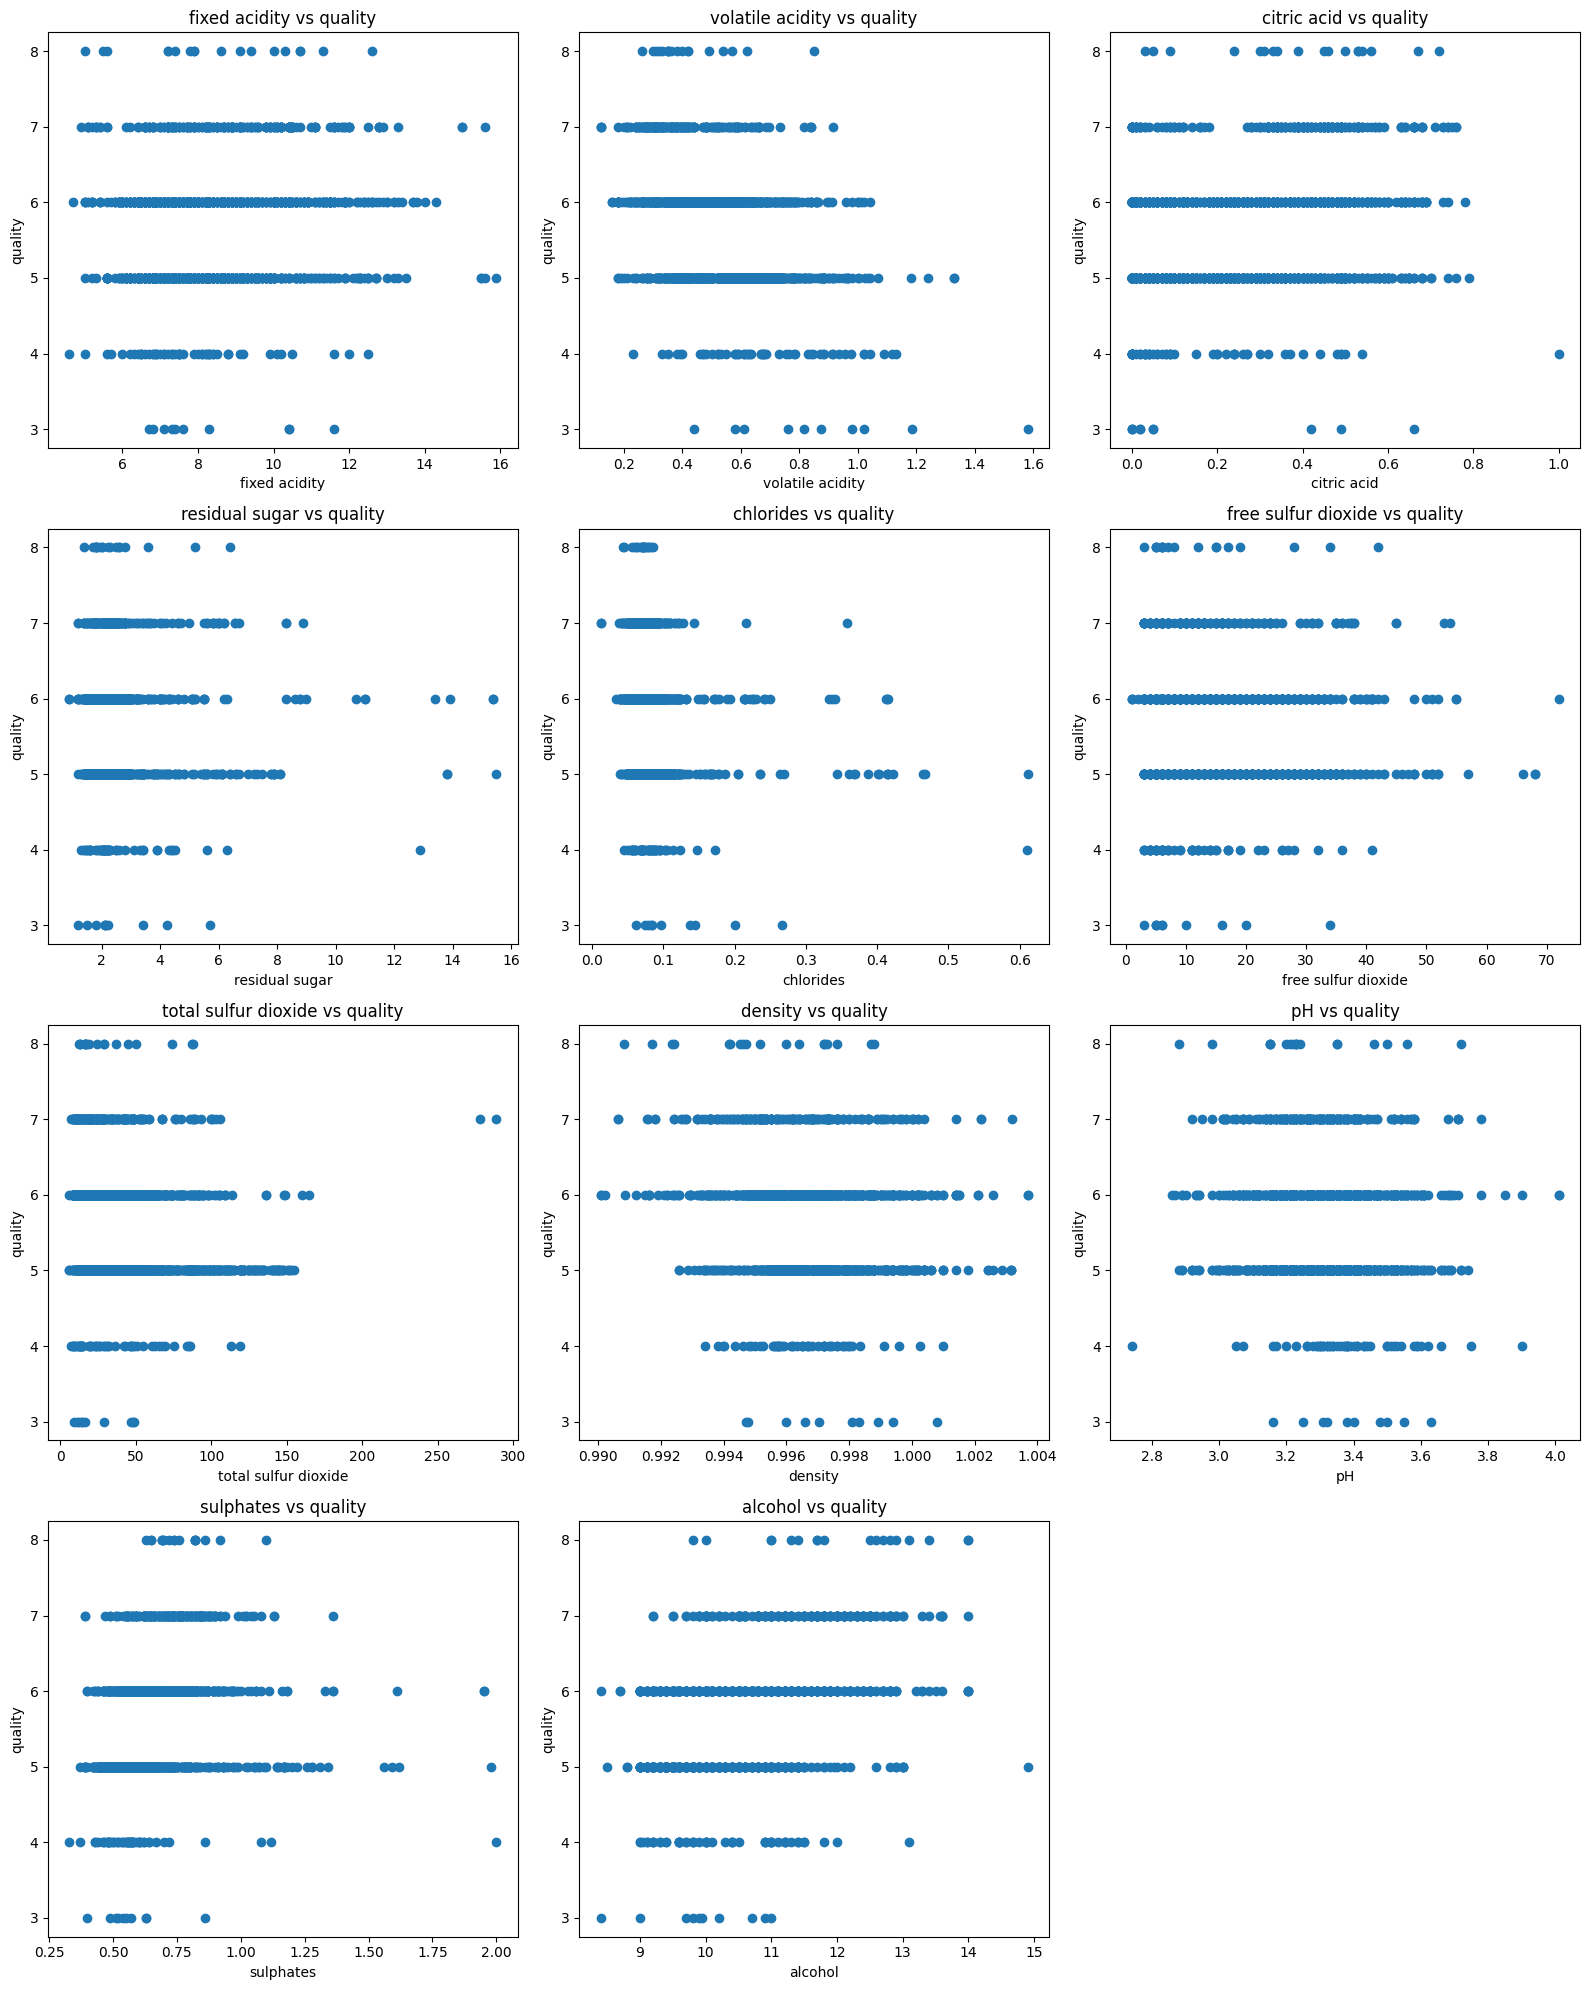

In [6]:
# YOUR CODE HERE
input_cols = [col for col in wine.columns if col != "quality"]

plt.figure(figsize=(16, 20))

for i, col in enumerate(input_cols, start=1):
    plt.subplot(4, 3, i)
    plt.scatter(wine[col], wine["quality"])
    plt.title(f"{col} vs quality")
    plt.xlabel(col)
    plt.ylabel("quality")
    plt.tight_layout()

plt.show()

YOUR ANSWERS HERE

__fixed acidity — mostly independent__\
The points are all over the place with no upward or downward trend. Wines with different fixed acidity levels get similar quality scores, so this looks mostly independent.

__volatile acidity — not independent__\
There’s a visible downward trend: higher volatile acidity tends to come with lower quality. This suggests they are not independent.

__citric acid — weak relationship (mostly independent)__\
There is a tiny upward slope, but it’s very loose. Quality doesn’t change much as citric acid increases, so it behaves mostly independently.

__residual sugar — independent__\
The scatterplot looks like a random cloud with no slope. Quality does not consistently go up or down with sugar levels.

__chlorides — weak negative relationship__\
Most points are scattered, but at very high chloride values, quality tends to drop. The overall relationship is weak, but not fully independent.

__free sulfur dioxide — independent__\
There is no noticeable trend. Quality stays similar across all free SO₂ values.

__total sulfur dioxide — independent__\
Same as free SO₂: very scattered with no direction. Independent.

__density — weak negative relationship__\
There’s a slight downward tilt — higher density usually matches slightly lower quality. Still weak, but not completely independent.

__pH — independent__\
The points show no pattern at all. Quality doesn’t depend on pH based on the plot.

__sulphates — not independent__\
There is a faint upward trend: wines with higher sulphates tend to score higher in quality. So these are not independent.

__alcohol — not independent (strongest trend)__\
This is the clearest pattern in all plots. Higher alcohol content consistently correlates with higher quality. Definitely not independent.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean Squared Error: 0.41676716722140805


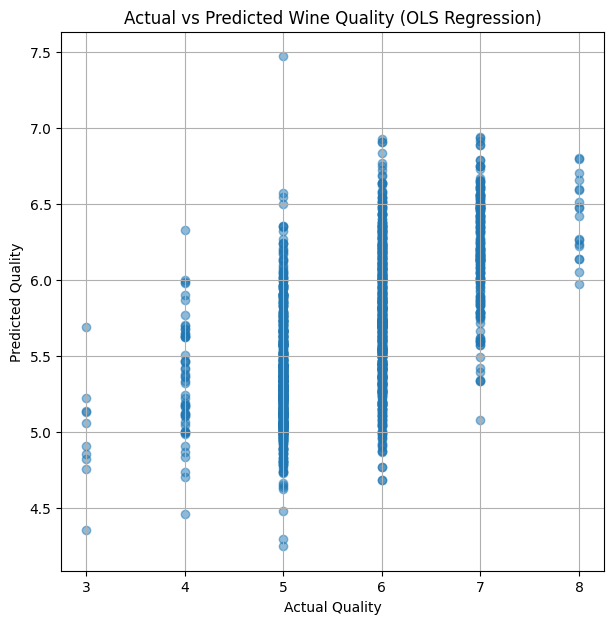

In [7]:
# YOUR CODE HERE
#separate inputs (X) and target (y)
X = wine.drop(columns=["quality"]).values
y = wine["quality"].values

#ordinary Least Squares regression model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

#predictions
y_pred = model.predict(X)

#mse
mse = np.mean((y - y_pred)**2)
print("Mean Squared Error:", mse)

#actual vs predicted
plt.figure(figsize=(7, 7))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality (OLS Regression)")
plt.grid(True)
plt.show()

YOUR ANSWERS HERE

__Mean Squared Error (MSE)__:
The model’s mean squared error is 0.4168 (rounded). Since wine quality is scored on a small 0–10 scale, an MSE around 0.4 means the model is typically off by about half a point. For this dataset, that is a realistic result because wine quality scores contain noise and subjective judgement.

__Actual vs Predicted Plot Interpretation__:
The scatterplot shows that predicted values generally increase as the actual quality increases, so the model does capture the main trend. However, the points are widely scattered instead of forming a tight diagonal line. This means the regression only explains part of the variation in wine quality. Wines with the same true rating often get a spread of predicted scores. Overall, the model performs moderately well: it identifies some meaningful relationships, but it cannot predict quality precisely for every wine.

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [8]:
# YOUR CODE HERE
input_cols = [c for c in wine.columns if c != "quality"]

best_col = None
best_mse = float("inf")

mse_results = {}

for col in input_cols:
    X_single = wine[[col]].values
    y = wine["quality"].values
    
    model = sklearn.linear_model.LinearRegression()
    model.fit(X_single, y)
    y_pred = model.predict(X_single)
    
    mse = np.mean((y - y_pred)**2)
    mse_results[col] = mse
    
    if mse < best_mse:
        best_mse = mse
        best_col = col

best_col, best_mse

('alcohol', np.float64(0.5039840256714571))

In [9]:
mse_results

{'fixed acidity': np.float64(0.6417307196439609),
 'volatile acidity': np.float64(0.5523439983981253),
 'citric acid': np.float64(0.6183613869155018),
 'residual sugar': np.float64(0.6516376452555722),
 'chlorides': np.float64(0.6409302993389623),
 'free sulfur dioxide': np.float64(0.6500880987339057),
 'total sulfur dioxide': np.float64(0.6294298439847829),
 'density': np.float64(0.6318187944965592),
 'pH': np.float64(0.6495882783089737),
 'sulphates': np.float64(0.6105689534614908),
 'alcohol': np.float64(0.5039840256714571)}

YOUR ANSWERS HERE


__Which input column gives the best linear model of the target on its own?__\
Based on the MSE values for each input feature, the best single predictor of wine quality is alcohol, with an MSE of approximately 0.504. This is the lowest MSE among all individual regressions, making alcohol the strongest standalone predictor. 

__How does that model compare to the model in problem 5?__\
The full OLS model using all predictors had an MSE of 0.4168, which is better (lower) than the alcohol-only model’s MSE of 0.504. This makes sense: combining all the chemical measurements captures more information than a single variable can. Even though most features individually have weak relationships with quality, together they still improve the model’s accuracy.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

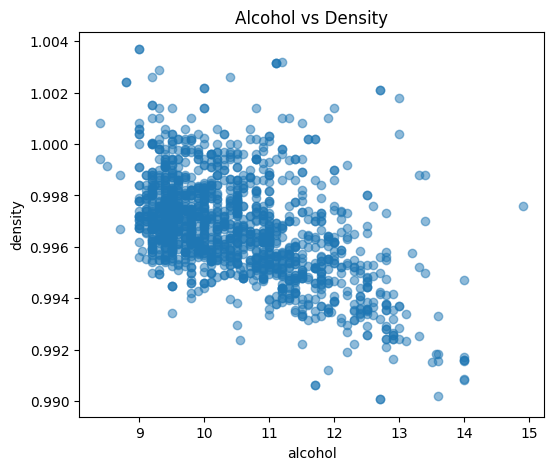

Threshold t for alcohol: 10.2


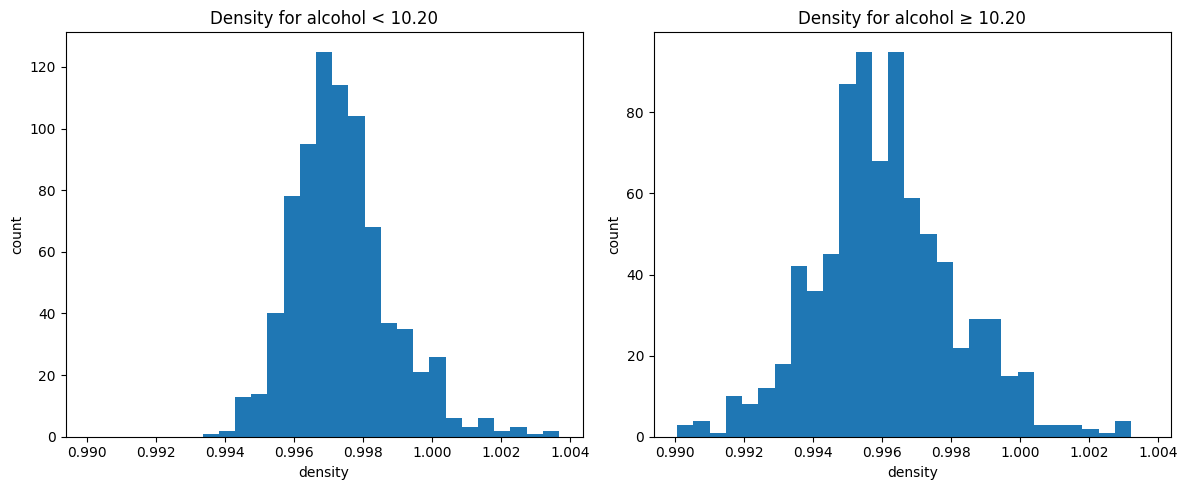

In [10]:
# YOUR CODE HERE
# pick a pair of input columns with a visible dependency.
x = wine["alcohol"]
y = wine["density"]

# plot a pair of input columns with a visible dependency
plt.figure(figsize=(6, 5))
plt.scatter(x, y, alpha=0.5)
plt.xlabel("alcohol")
plt.ylabel("density")
plt.title("Alcohol vs Density")
plt.show()

# pick a threshold t for alcohol.
t = x.median()
print("Threshold t for alcohol:", t)

low_density = y[x < t]
high_density = y[x >= t]

# bins for both histograms for identical x-axis  
bins = np.linspace(wine["density"].min(), wine["density"].max(), 30)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(low_density, bins=bins)
plt.title(f"Density for alcohol < {t:.2f}")
plt.xlabel("density")
plt.ylabel("count")

plt.subplot(1, 2, 2)
plt.hist(high_density, bins=bins)
plt.title(f"Density for alcohol ≥ {t:.2f}")
plt.xlabel("density")
plt.ylabel("count")

plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

I picked alcohol and density. In the scatterplot, there is a clear negative relationship: wines with higher alcohol tend to have lower density. The points form a downward cloud rather than a random blob, which suggests these two variables are not independent. I used the median alcohol value as the threshold _t_. This splits the data into “lower alcohol” and “higher alcohol” groups with roughly the same number of wines in each group, so both histograms have plenty of data.

__Comparison__
When plotting density for the two alcohol groups using the same horizontal axis:
* For wines with alcohol < 10.2, the density distribution is shifted toward higher density values.
* For wines with alcohol ≥ 10.2, the density distribution shifts downward, showing noticeably lower density values.

These two histograms look significantly different, and the shift in density aligns with the negative dependency seen in the scatterplot. This demonstrates that alcohol and density are strongly related: as alcohol increases, density tends to decrease.

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

Explained variance ratios: [9.46576976e-01 4.83683046e-02 2.58917183e-03 1.51896798e-03
 8.73553990e-04 3.45607218e-05 1.93627614e-05 9.47278079e-06
 8.41376628e-06 1.21472798e-06 4.68762788e-10]
Number of PCs used: 5
Variance explained by first half of PCs: 0.9999269747729662
MSE with first-half PCs: 0.4800349488599429


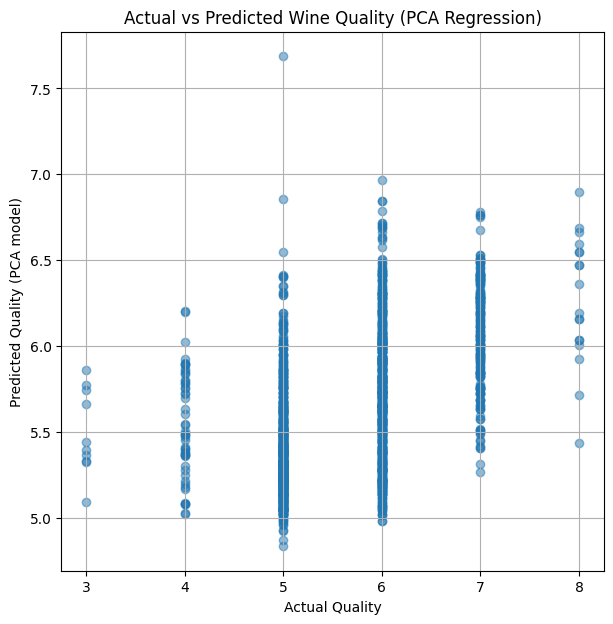

In [11]:
# YOUR CODE HERE

# take only input columns (exclude "quality")
input_cols = [c for c in wine.columns if c != "quality"]
X = wine[input_cols].values
y = wine["quality"].values

# fit PCA on the inputs
pca = PCA()
X_pca = pca.fit_transform(X)

# variance ratios for each PC
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratios:", var_ratio)

# first half of components (floor division)
num_components = len(input_cols) // 2   # 11 -> 5
print("Number of PCs used:", num_components)

variance_first_half = var_ratio[:num_components].sum()
print("Variance explained by first half of PCs:", variance_first_half)

# build regression using only first half of PCs
X_pca_half = X_pca[:, :num_components]

model_pca = sklearn.linear_model.LinearRegression()
model_pca.fit(X_pca_half, y)

y_pred_pca = model_pca.predict(X_pca_half)

mse_pca = np.mean((y - y_pred_pca)**2)
print("MSE with first-half PCs:", mse_pca)

# plot actual vs predicted for PCA-based model
plt.figure(figsize=(7, 7))
plt.scatter(y, y_pred_pca, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality (PCA model)")
plt.title("Actual vs Predicted Wine Quality (PCA Regression)")
plt.grid(True)
plt.show()

YOUR ANSWERS HERE

The PCA analysis of the 11 input features shows that the first few principal components capture almost all of the variation in the data. The first principal component alone explains 94.66% of the total variance, and the second principal component explains an additional 4.84%. The remaining components each contribute extremely small amounts. When summed together, the first five principal components account for 99.992697% of all variance in the input space. This confirms that the chemical measurements are highly correlated and can be represented in a much lower-dimensional space with almost no loss of information.

Using only the first five principal components, I built a linear regression model and obtained a mean squared error of 0.48003. In comparison, the full regression model from Problem 5 (using all original input columns) had an MSE of 0.41677. The PCA-based model performs slightly worse, which is expected because PCA reduces the dimensionality without considering the target variable. While PCA preserves almost all of the overall data variation, it does not necessarily preserve all of the variation that is most relevant to predicting wine quality.

The actual-vs-predicted plot for the PCA model shows a similar structure to the full model’s plot, but the points are a bit more spread out from the diagonal, reflecting the slightly higher error. Overall, PCA offers a compact representation of the inputs, but the full model remains the more accurate predictor.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [ ]:
# YOUR CODE HERE
# start with computing a correlation matrix of input columns only
input_cols = [c for c in wine.columns if c != "quality"]
corr_matrix = wine[input_cols].corr()

# finding the pair with highest correlation, excluding self-correlation
max_corr = 0
best_pair = None

for i in range(len(input_cols)):
    for j in range(i + 1, len(input_cols)):
        c1, c2 = input_cols[i], input_cols[j]
        corr_value = abs(corr_matrix.loc[c1, c2])
        if corr_value > max_corr:
            max_corr = corr_value
            best_pair = (c1, c2, corr_matrix.loc[c1, c2])

best_pair, max_corr

(('fixed acidity', 'pH', np.float64(-0.6829781945685302)),
 np.float64(0.6829781945685302))

In [14]:
corr_matrix 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


YOUR ANSWERS HERE

The pair of input columns with the highest correlation is fixed acidity and pH, with a strong negative correlation of −0.682978. This means that as fixed acidity increases, pH decreases, which matches the expected chemical relationship between acidity and hydrogen ion concentration.

This strong correlation is clearly reflected in the principal components from Problem 8. The first principal component (PC1) explained 94.66% of the total variance, indicating that most of the structure in the dataset comes from highly correlated variables moving together. Since fixed acidity and pH have the strongest correlation, they contribute heavily and in opposite directions to PC1. As a result, their shared pattern of variation is essentially captured in this single dominant component, leaving very little independent variation for the later components to explain.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [16]:
# YOUR CODE HERE

input_cols = [c for c in wine.columns if c != "quality"]
X = wine[input_cols]

# z-scores for each column
z_scores = np.abs(scipy.stats.zscore(X))

# row with the highest z-score across all columns
max_z = np.max(z_scores)               # value
row_index = np.unravel_index(np.argmax(z_scores), z_scores.shape)[0]  # row location

print("Maximum z-score:", max_z)
print("Outlier row index:", row_index)
print("Outlier row values:")
wine.iloc[row_index]

Maximum z-score: 11.127034553969864
Outlier row index: 258
Outlier row values:


fixed acidity            7.7000
volatile acidity         0.4100
citric acid              0.7600
residual sugar           1.8000
chlorides                0.6110
free sulfur dioxide      8.0000
total sulfur dioxide    45.0000
density                  0.9968
pH                       3.0600
sulphates                1.2600
alcohol                  9.4000
quality                  5.0000
Name: 258, dtype: float64

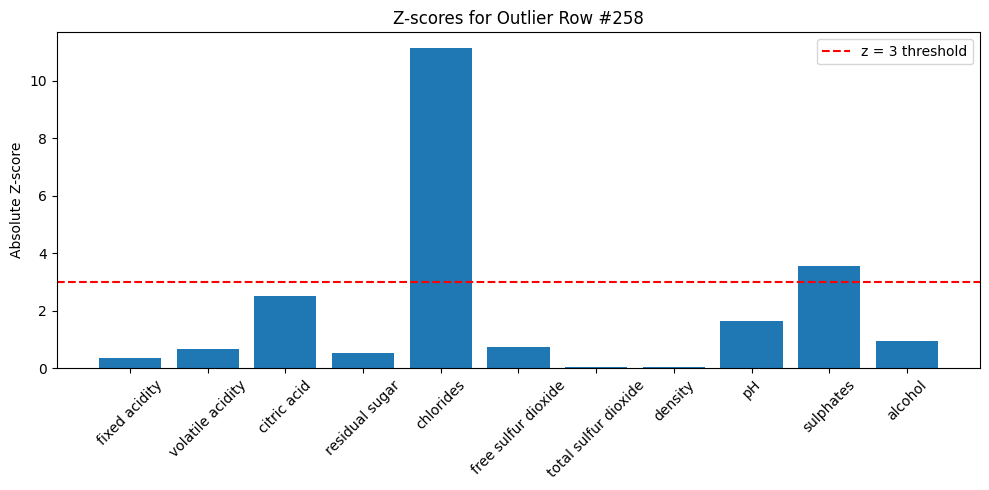

In [17]:
# visualization of the outlier's z-scores

outlier_z = z_scores[row_index]

plt.figure(figsize=(10, 5))
plt.bar(input_cols, outlier_z)
plt.axhline(3, color='red', linestyle='--', label='z = 3 threshold')
plt.title(f"Z-scores for Outlier Row #{row_index}")
plt.ylabel("Absolute Z-score")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

To identify an outlier in the dataset, I used z-scores, which measure how many standard deviations each value is from the mean of its column. A common statistical rule is that values with a z-score greater than 3 are considered outliers, because in a normal distribution fewer than 0.3% of data points lie that far from the mean.

I computed absolute z-scores for every input column and looked for the largest value.
The row with the highest z-score was:

* Row index: 258
* Maximum z-score: 11.1270

This z-score is far above the threshold of 3, and even far above typical “strong” outliers (z ≈ 4–6). This makes row 258 an extreme outlier.

Looking at the row’s actual values, the main reason it stands out is the chlorides value of 0.6110, which is extraordinarily high for this dataset. Most wines have chloride levels around 0.05–0.1. This single value produced a z-score of more than 11, which is why the row was flagged so strongly. Additionally, the row has unusually high sulphates (1.26), which also produced a z-score above 3, further confirming it as an outlier.

__Visualization__

The z-score bar plot makes the outlier very clear: the chlorides value has a z-score above 11, which is far beyond the typical cutoff of 3. Sulphates is also noticeably elevated. These spikes stand out sharply against the rest of the variables, showing that row 258 is far outside the normal range and confirming it as a true outlier.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE

GitHub code assistant on the right side bar